In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import numpy as np

In [76]:
df = pd.read_csv("PEDE_PASSOS_DATASET_FIAP-empilhados.csv", sep=",", encoding="utf-8",engine="python", decimal=".")

In [77]:
df.head()

,NOME,Ano,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE
0,ALUNO-1,2020,8.50002,8.7,7.500,7.0,5.9375,7.750000,10.0,7.883752
1,ALUNO-2,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALUNO-3,2020,7.91667,8.9,7.500,5.5,8.1250,8.111113,10.0,7.856390
3,ALUNO-4,2020,8.00002,4.1,6.875,0.0,7.1875,7.750000,5.0,5.076252
4,ALUNO-5,2020,7.50002,8.0,7.500,7.5,8.4375,8.166665,10.0,8.077085


In [78]:
df.fillna(0,inplace=True)


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NOME    4042 non-null   object 
 1   Ano     4042 non-null   int64  
 2   IAA     4042 non-null   float64
 3   IEG     4042 non-null   float64
 4   IPS     4042 non-null   float64
 5   IDA     4042 non-null   float64
 6   IPP     4042 non-null   float64
 7   IPV     4042 non-null   float64
 8   IAN     4042 non-null   float64
 9   INDE    4042 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 315.9+ KB


In [80]:
# Alunos po ano fonte : PEDE2022
alunos_por_ano = pd.DataFrame({"Ano":["2020","2021","2022"],"Alunos":[727,737,929]})

In [81]:

fig_1 = px.bar(alunos_por_ano, x='Ano', y='Alunos',
             hover_data=["Alunos"],color="Alunos",
             labels={'Alunos':'Quantidade de Alunos Ingressantes'}, height=500)

fig_1.update_layout(
    title="Quantidade de Alunos ingressantes por Ano ",
    xaxis_title="Ano",
    yaxis_title="Alunos ingressantes",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))
fig_1.show()

In [82]:
df_media = df.iloc[:,[1,2,3,4,5,6,7,8,9]]
df_media


,Ano,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE
0,2020,8.50002,8.700000,7.500,7.0,5.93750,7.750000,10.0,7.883752
1,2020,0.00000,0.000000,0.000,0.0,0.00000,0.000000,0.0,0.000000
2,2020,7.91667,8.900000,7.500,5.5,8.12500,8.111113,10.0,7.856390
3,2020,8.00002,4.100000,6.875,0.0,7.18750,7.750000,5.0,5.076252
4,2020,7.50002,8.000000,7.500,7.5,8.43750,8.166665,10.0,8.077085
...,...,...,...,...,...,...,...,...,...
4037,2022,0.00000,0.000000,0.000,0.0,0.00000,0.000000,0.0,0.000000
4038,2022,9.00002,9.031839,7.500,9.0,5.62500,9.083340,5.0,8.135538
4039,2022,0.00000,0.000000,0.000,0.0,0.00000,0.000000,0.0,0.000000
4040,2022,8.33334,9.178030,5.625,5.9,6.71875,5.833328,5.0,6.749981


In [83]:
df_2020 = df_media.query("Ano == 2020").query("IAA !=0 ").mean()
df_2021 = df_media.query("Ano == 2021").query("IAA !=0 ").mean()
df_2022 = df_media.query("Ano == 2022").query("IAA !=0 ").mean()



In [84]:
df_2020 = pd.DataFrame(df_2020).T
df_2021 = pd.DataFrame(df_2021).T
df_2022 = pd.DataFrame(df_2022).T

In [85]:
df_medias = pd.concat([df_2020,df_2021,df_2022])
df_medias['Ano'] = ["2020","2021","2022"]
df_medias


,Ano,IAA,IEG,IPS,IDA,IPP,IPV,IAN,INDE
0,2020,8.617814,7.762748,6.747521,6.422781,7.072636,7.255548,7.411473,7.359056
0,2021,8.635449,7.047368,6.871517,5.594272,7.622291,7.528019,6.965944,7.040731
0,2022,8.665161,7.983744,6.915298,6.147966,6.281744,7.290669,6.429440,7.113640


In [86]:

fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df_medias.Ano, y=df_medias.IAA, name="IAA",
                    ))
fig_2.add_trace(go.Scatter(x=df_medias.Ano, y=df_medias.IEG, name="IEG",
                    ))
fig_2.add_trace(go.Scatter(x=df_medias.Ano, y=df_medias.IPS, name="IPS",
                    ))
fig_2.add_trace(go.Scatter(x=df_medias.Ano, y=df_medias.IDA, name="IDA",
                    ))
fig_2.add_trace(go.Scatter(x=df_medias.Ano, y=df_medias.IPP, name="IPP",
                    ))
fig_2.add_trace(go.Scatter(x=df_medias.Ano, y=df_medias.IPV, name="IPV",
                    ))
fig_2.add_trace(go.Scatter(x=df_medias.Ano, y=df_medias.IAN, name="IAN",
                    ))

fig_2.update_layout(
    title="Valores médios dos indicadores",
    xaxis_title="Ano",
    yaxis_title="Média",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))
fig_2.show()

### O gráfico acima desmotra as médias por anos de cada indicador do Ídice de desenvolvimento educacional da Passos

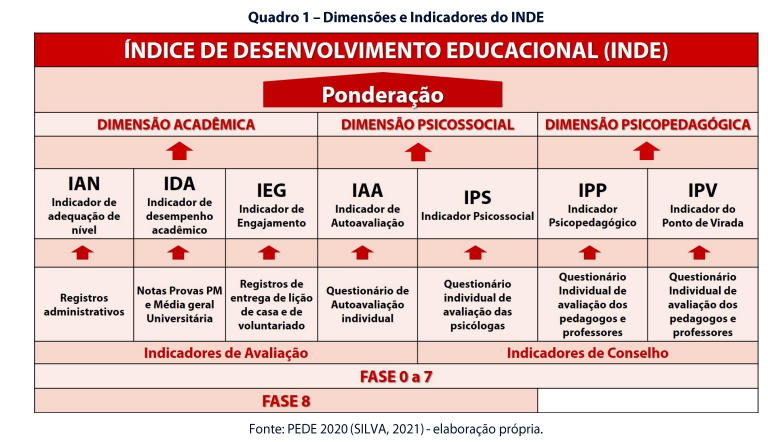

In [87]:
df_2 = pd.read_csv("PEDE_PASSOS_DATASET_FIAP-original.csv", sep=",", decimal=".", encoding="latin-1")

In [88]:
df_2.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,...,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11.0,2.0,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12.0,2.0,3H,Não,7.856390,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10.0,2.0,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,...,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10.0,1.0,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,...,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)


In [89]:
df_2.fillna(0, inplace=True)

In [90]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   INSTITUICAO_ENSINO_ALUNO_2020  1348 non-null   object 
 1   NOME                           1348 non-null   object 
 2   IDADE_ALUNO_2020               1348 non-null   float64
 3   ANOS_PM_2020                   1348 non-null   float64
 4   FASE_TURMA_2020                1348 non-null   object 
 5   PONTO_VIRADA_2020              1348 non-null   object 
 6   INDE_2020                      1348 non-null   float64
 7   INDE_CONCEITO_2020             1348 non-null   object 
 8   PEDRA_2020                     1348 non-null   object 
 9   DESTAQUE_IEG_2020              1348 non-null   object 
 10  DESTAQUE_IDA_2020              1348 non-null   object 
 11  DESTAQUE_IPV_2020              1348 non-null   object 
 12  IAA_2020                       1348 non-null   f

In [118]:
df_notas = df_2.iloc[:,[55,56,57]]
df_notas = df_notas.query("NOTA_PORT_2022 !=0 and NOTA_MAT_2022 !=0")
df_medias = pd.DataFrame(df_notas.mean())
df_medias.reset_index(inplace=True)
df_medias.rename(columns={"index":"notas",0:"media"}, inplace=True)
df_medias

,notas,media
0,NOTA_PORT_2022,5.891677
1,NOTA_MAT_2022,6.417603
2,NOTA_ING_2022,1.987714


In [133]:

fig_3 = px.bar(df_medias, x='notas', y='media',color="media",
             labels={'media':'Médias'}, height=500)

fig_3.add_hline(4.41)

fig_3.update_layout(
    title=" Médias Portugues e Matematica ",
    xaxis_title="Materias",
    yaxis_title="Médias",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))
fig_3.show()

Segundo Ideb (https://qedu.org.br/brasil/ideb) 
Nota padronizada em português e matemática de acordo com a Prova Saeb/2021
é de 4,41  que é representada pela linha no gráfico .

In [146]:
df_virada = df_2[["NOME","PONTO_VIRADA_2022"]]
df_virada = df_virada.query("PONTO_VIRADA_2022 !=0")
df_virada = pd.DataFrame(df_virada.groupby("PONTO_VIRADA_2022")["PONTO_VIRADA_2022"].count())
df_virada.rename(columns={"PONTO_VIRADA_2022":"valores"}, inplace=True)
df_virada.reset_index(inplace=True)
df_virada["%"] = [(749/(749+113))*100,(113/(749+113))*100]
df_virada

,PONTO_VIRADA_2022,valores,%
0,Não,749,86.890951
1,Sim,113,13.109049


In [131]:
df_virada.shape

(862, 2)

In [148]:

fig_1 = px.bar(df_virada, x =df_virada["PONTO_VIRADA_2022"],y = df_virada["%"],color="PONTO_VIRADA_2022", height=500)

fig_1.update_layout(
    title="Ponto de Virada ",
    xaxis_title="Sim ou Não ",
    yaxis_title="Quantidade ",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))
fig_1.show()